In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import string
pd.set_option('max_colwidth',150)

In [45]:
df = pd.read_csv("../data/raw/data.csv")
df

,category,title,body
0,ARTS & CULTURE,"Modeling Agencies Enabled Sexual Predators For Years, Former Agent Says","In October 2017, Carolyn Kramer received a disturbing phone call. The former modeling agent listened intently as a model she used to represent tol..."
1,ARTS & CULTURE,Actor Jeff Hiller Talks “Bright Colors And Bold Patterns” and More (AUDIO),This week I talked with actor Jeff Hiller about the hit Off Broadway play Bright Colors And Bold Patterns that he’ll be joining on January 17th wi...
2,ARTS & CULTURE,New Yorker Cover Puts Trump 'In The Hole' After 'Racist' Comment,The New Yorker is taking on President Donald Trump after he asked why the U.S. would welcome immigrants from “shithole” places like Haiti and Afri...
3,ARTS & CULTURE,Man Surprises Girlfriend By Drawing Them In Different Animation Styles,"Kellen Hickey, a 26-year-old who lives in Hudson, Wisconsin, has gift giving down to a fine art. He drew himself and his girlfriend Lindsay Brinkm..."
4,ARTS & CULTURE,This Artist Gives Renaissance-Style Sculptures A Goofy Modern Twist,"There’s something about combining the traditional, uptight look of the Renaissance period with modern-day behavior that excites Barcelona-based ar..."
...,...,...,...
6872,WOMEN,Casually Fearless: Why Millennials Are Natural Entrepreneurs,I still think about that Tuesday night dinner when my 22-year-old daughter told me she was leaving her full-time job at a Silicon Valley startup. ...
6873,WOMEN,Happy Birthday To Us,"I remember the morning of my high school graduation very clearly. As I put on my white linen dress and matching ballet slippers, my mother tried t..."
6874,WOMEN,The Culture of Love,"My husband, Gene, doesn't wear pajamas. I asked him about it once, and he told me that he never had pajamas as a child. He also took care of his f..."
6875,WOMEN,"Carpe Diem, Oprah Style","\nBy AntonioGuillem, via ThinkStock\nBy Lisa O'Donoghue-Lindy, Managing Editor, SJWEH This article was originally featured on career2.0blog.net, ..."


In [3]:
df.body = df.body.astype('str')

In [4]:
remove_line_break = lambda column: re.sub(r"[\n]", "", column)
convert_to_lowercase = lambda column : column.lower()
remove_punctuations = lambda column: re.sub(f"[{re.escape(string.punctuation)}]", "", column)
remove_words_inside_parentheses = lambda column: re.sub(r"[({\[].*[)}\]]", "", column)
remove_numbers = lambda column: re.sub(r"\d", "", column)
remove_other_signs = lambda column : re.sub(r"[%$][\w\.\,]*", "", column)
remove_emails = lambda column : re.sub(r"\w+@\w+", "", column)
remove_non_unicode_symbols = lambda column: re.sub(r"[“”’―]", "", column)
remove_single_characters = lambda column: re.sub(r"\b[a-zA-Z]\b", "", column)
remove_extra_whitespaces = lambda column: re.sub(r"  +", " ", column)
remove_websites = lambda column: re.sub(r"^www\w+com$", "", column)
remove_non_english_characters = lambda column: re.sub(r"[^a-zA-Z ]", "", column)
remove_multi_repeat_characters = lambda column: re.sub(r"(\w)\1{2,}","", column)
remove_unusual_characters = lambda column: column.replace("\xa0", " ")

In [5]:
def clean_string(column):
    column = column.apply(remove_line_break)
    column = column.apply(convert_to_lowercase)
    column = column.apply(remove_punctuations)
    column = column.apply(remove_words_inside_parentheses)
    column = column.apply(remove_numbers)
    column = column.apply(remove_other_signs)
    column = column.apply(remove_emails)
    column = column.apply(remove_non_unicode_symbols)
    column = column.apply(remove_single_characters)
    column = column.apply(remove_unusual_characters)
    column = column.apply(remove_websites)
    column = column.apply(remove_non_english_characters)
    column = column.apply(remove_multi_repeat_characters)
    column = column.apply(remove_extra_whitespaces)
    return column

In [46]:
categories = df['category'].unique()
sizes = [df[df['category'] == category].shape[0] for category in categories]
categories

array(['ARTS & CULTURE', 'BUSINESS', 'COMEDY', 'CRIME', 'EDUCATION',
       'ENTERTAINMENT', 'ENVIRONMENT', 'MEDIA', 'POLITICS', 'RELIGION',
       'SCIENCE', 'SPORTS', 'TECH', 'WOMEN'], dtype=object)

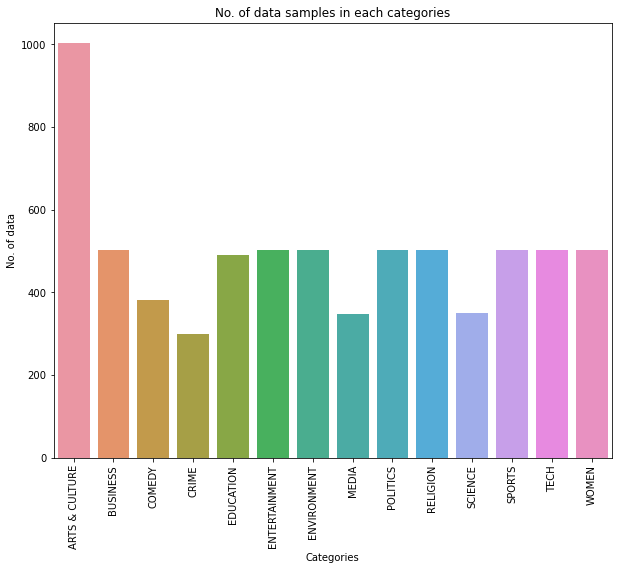

In [44]:
import seaborn as sns

fig = plt.figure(figsize=(10,8))
bplot = sns.barplot(x=categories, y=sizes)
bplot.set_title("No. of data samples in each categories")
bplot.set_xlabel("Categories")
bplot.set_ylabel("No. of data")
for item in bplot.get_xticklabels():
    item.set_rotation(90)

plt.savefig("../figures/no_saples.png")


In [6]:
df['body'] = clean_string(df['body'])
df['title'] = clean_string(df['title'])

In [8]:
df.to_csv("../data/preprocessed/corpus.csv", index=False)

## Document Term-Matrix

In [18]:
df_body = df.drop("title", axis=1)
df_body.head()

,category,body
0,ARTS & CULTURE,"In October 2017, Carolyn Kramer received a disturbing phone call. The former modeling agent listened intently as a model she used to represent tol..."
1,ARTS & CULTURE,This week I talked with actor Jeff Hiller about the hit Off Broadway play Bright Colors And Bold Patterns that he’ll be joining on January 17th wi...
2,ARTS & CULTURE,The New Yorker is taking on President Donald Trump after he asked why the U.S. would welcome immigrants from “shithole” places like Haiti and Afri...
3,ARTS & CULTURE,"Kellen Hickey, a 26-year-old who lives in Hudson, Wisconsin, has gift giving down to a fine art. He drew himself and his girlfriend Lindsay Brinkm..."
4,ARTS & CULTURE,"There’s something about combining the traditional, uptight look of the Renaissance period with modern-day behavior that excites Barcelona-based ar..."


In [21]:
from sklearn.feature_extraction.text import CountVectorizer

In [22]:
cv = CountVectorizer(stop_words="english")
data_cv = cv.fit_transform(df_body.body)
data_dtm = pd.DataFrame(data_cv.toarray(), columns = cv.get_feature_names())
data_dtm.index = df_body.category

In [23]:
data_dtm

,00,000,0000009,0000075,00016,000mah,000s,000th,001,001232733,...,モスク,伊朗,心からそう思いました,相由心生,米兔,米兔不能忘,米兔在中国,诵经,鏡張り,ﬁrst
category,,,,,,,,,,,,,,,,,,,,,
ARTS & CULTURE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ARTS & CULTURE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ARTS & CULTURE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ARTS & CULTURE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ARTS & CULTURE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WOMEN,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
WOMEN,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
WOMEN,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
import pickle

data_dtm.to_pickle("../data/preprocessed/data_dtm.pkl")
pickle.dump(cv, open("../data/preprocessed/cv.pkl", "wb"))